In [1]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

# load the training dataset - CSV from 2022 https://insights.stackoverflow.com/survey
survey_data = pd.read_csv('data/survey_results_public.csv')
survey_data.head(10)

FileNotFoundError: [Errno 2] No such file or directory: 'data/survey_results_public.csv'

In [ ]:
aining dataset - CSV from 2022 https://insights.stackoverflow.com/survey
survey_data = pd.read_csv('data/survey_results_public.csv')
survey_data.head(10)

In [52]:
survey_data = survey_data.dropna(subset = ["ConvertedCompYearly"])  
survey_data = survey_data.drop(survey_data[survey_data['ConvertedCompYearly'] > 400000].index)
survey_data[['ConvertedCompYearly']].describe()

,ConvertedCompYearly
count,36260.00000
mean,80720.59956
std,65852.55164
min,1.00000
25%,33888.75000
50%,63986.00000
75%,110000.00000
max,400000.00000


In [59]:
numeric_features = ['YearsCode', 'YearsCodePro']
def munge_years(col_name):
    global survey_data
    survey_data[col_name] = pd.to_numeric(survey_data[col_name], errors='coerce')
    survey_data = survey_data.dropna(subset = [col_name])  

for col_name in numeric_features:
    munge_years(col_name)

survey_data[numeric_features].describe()

,YearsCode,YearsCodePro
count,34685.00000,34685.00000
mean,14.65435,9.84965
std,9.39327,8.06248
min,1.00000,1.00000
25%,8.00000,4.00000
50%,12.00000,7.00000
75%,20.00000,14.00000
max,50.00000,50.00000


In [76]:
survey_data['EdLevelNumeric'] = survey_data['EdLevel'].map({
    'Professional degree (JD, MD, etc.)': 24,
    'Other doctoral degree (Ph.D., Ed.D., etc.)': 22,
    'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)': 18,
    'Bachelor’s degree (B.A., B.S., B.Eng., etc.)': 16,
    'Associate degree (A.A., A.S., etc.)': 14,
    'Some college/university study without earning a degree': 13,
    'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)': 12,
    'Primary/elementary school': 6,
    'Something else': 0,
})
survey_data = survey_data.dropna(subset = ["EdLevelNumeric"])
numeric_features.append('EdLevelNumeric')

/var/folders/nq/2sq7jzp17tl97sgxzbptr2d80000gn/T/ipykernel_81719/862188878.py:24: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


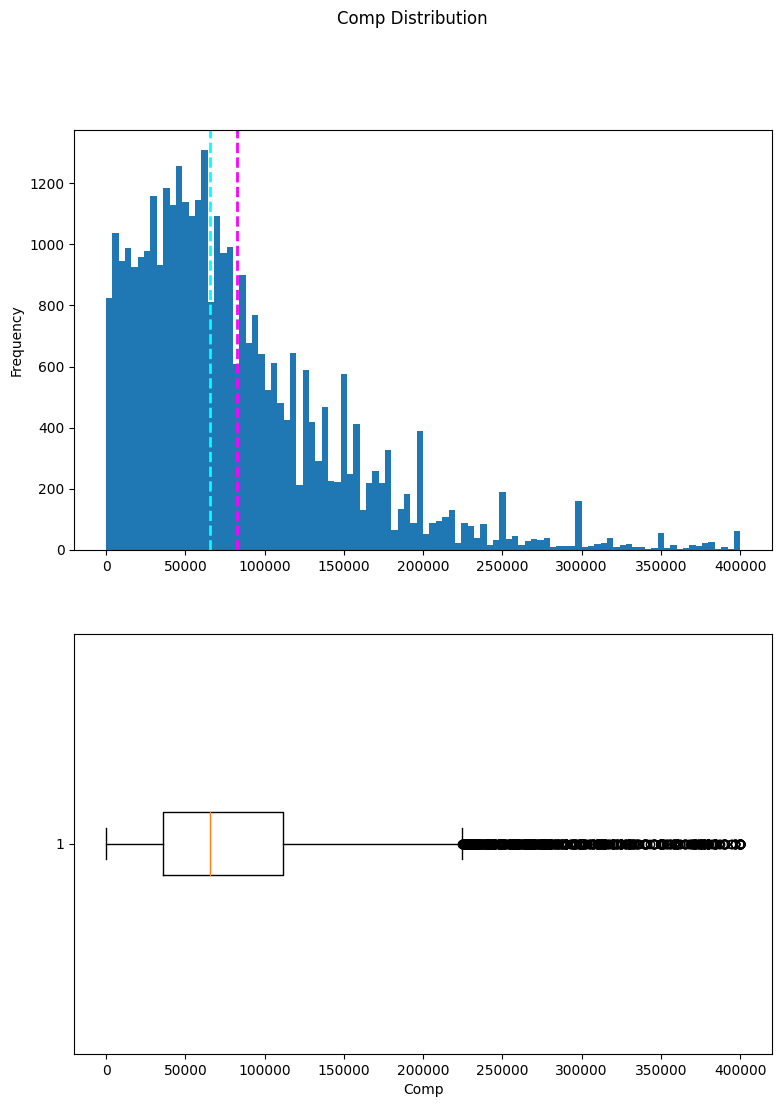

In [60]:
import matplotlib.pyplot as plt
# This ensures plots are displayed inline in the Jupyter notebook
%matplotlib inline

# Get the label column
label = survey_data['ConvertedCompYearly']

# Create a figure for 2 subplots (2 rows, 1 column)
fig, ax = plt.subplots(2, 1, figsize = (9,12))

# Plot the histogram   
ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frequency')

# Add lines for the mean, median, and mode
ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)
# Plot the boxplot   
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Comp')
# Add a title to the Figure
fig.suptitle('Comp Distribution')
# Show the figure
fig.show()

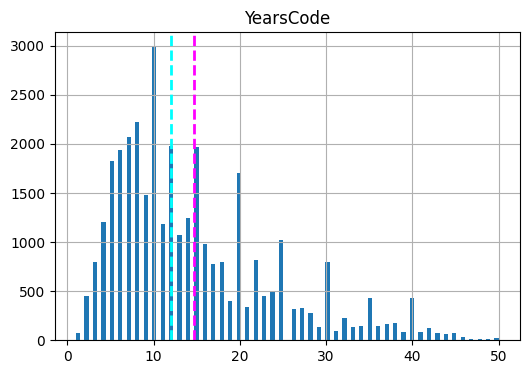

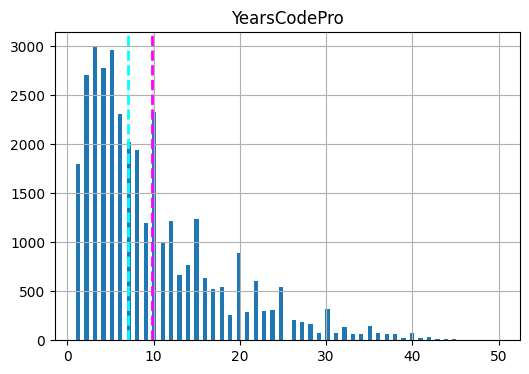

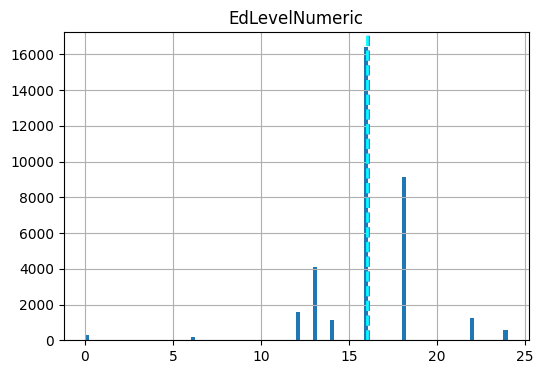

In [77]:
for col_name in numeric_features:
    fig = plt.figure(figsize=(6, 4))
    ax = fig.gca()
    feature = survey_data[col_name]
    feature.hist(bins=100, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col_name)
    plt.show()

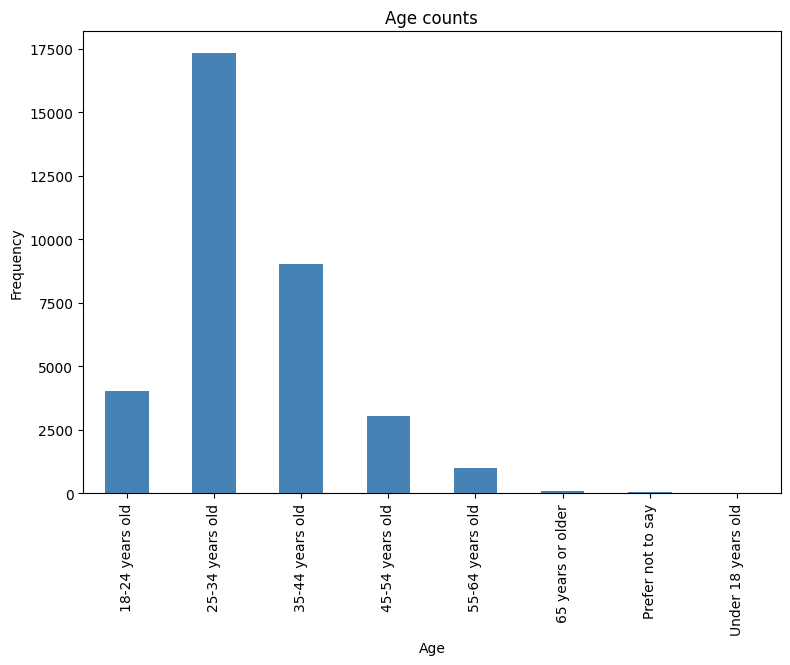

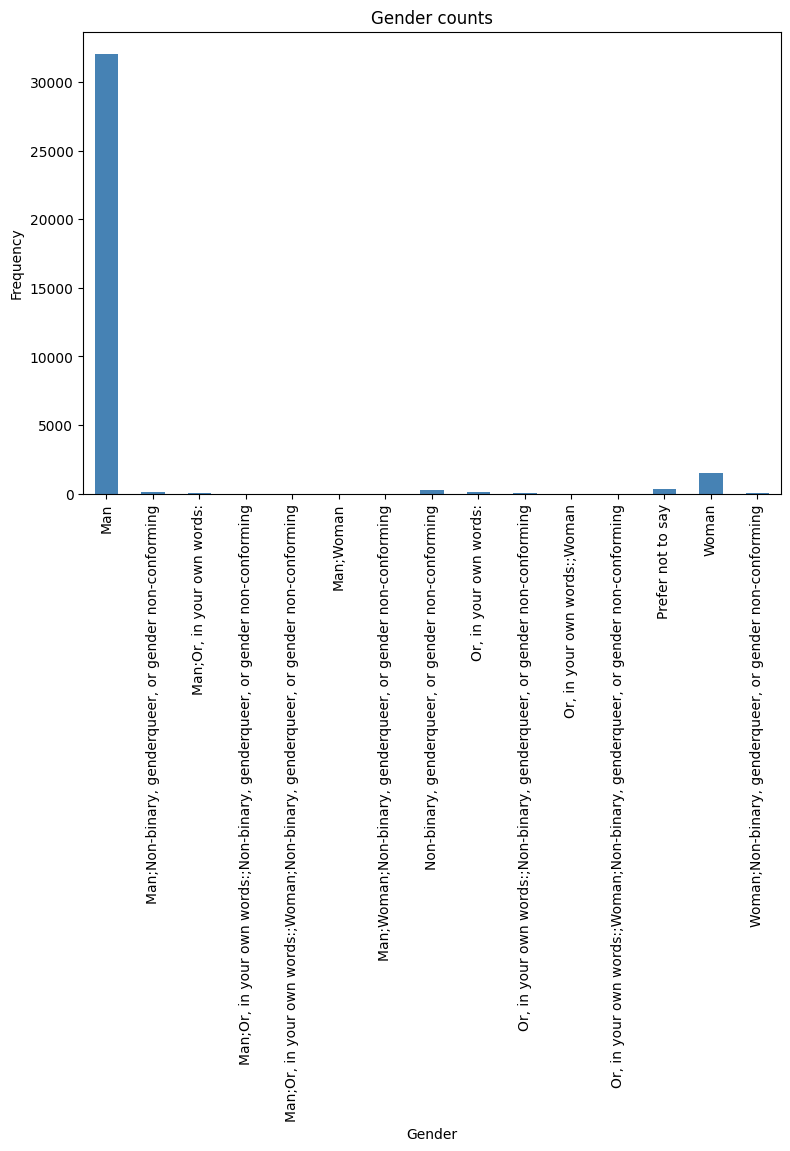

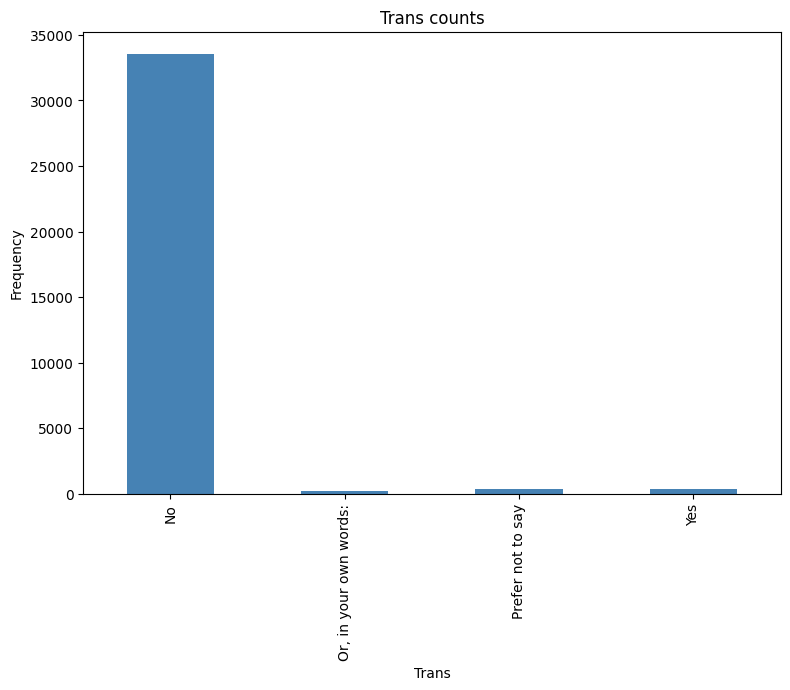

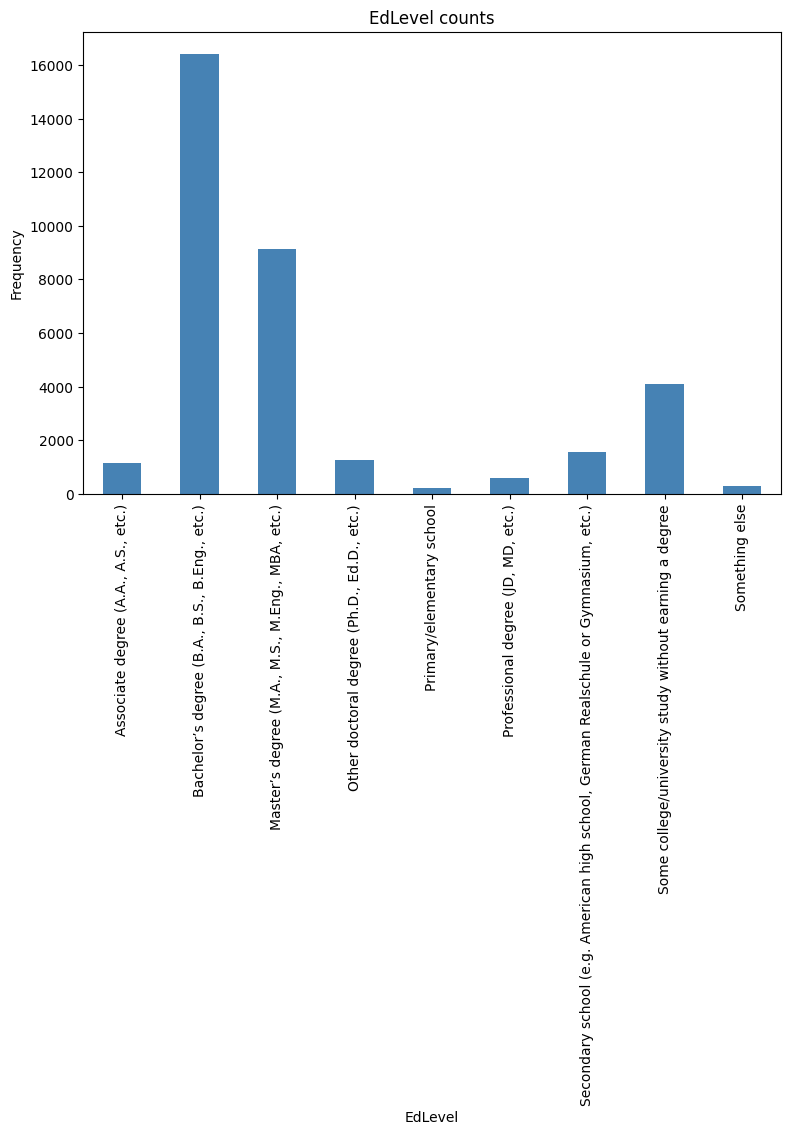

In [67]:
import numpy as np

# plot a bar plot for each categorical feature count
categorical_features = ['Age','Gender','Trans', 'EdLevel']

for col in categorical_features:
    counts = survey_data[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()


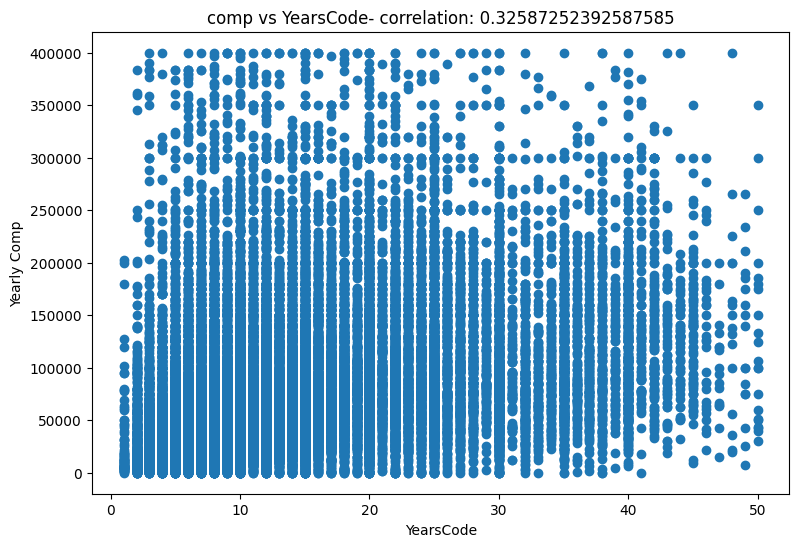

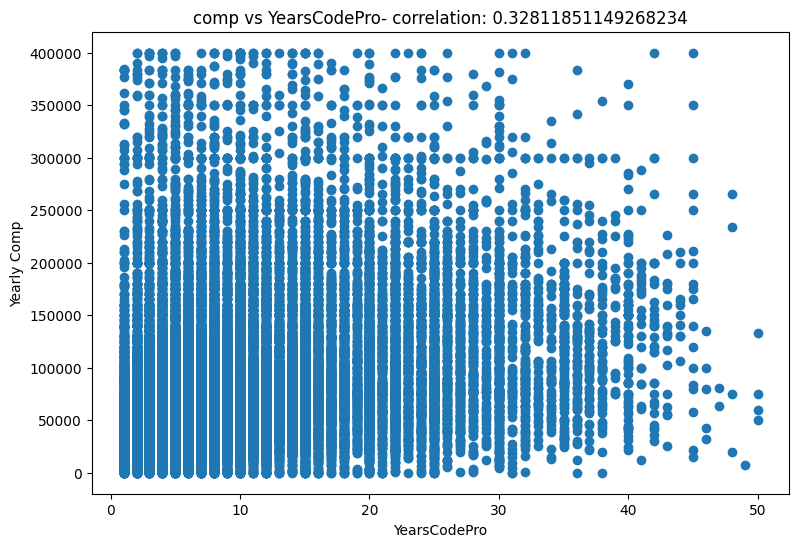

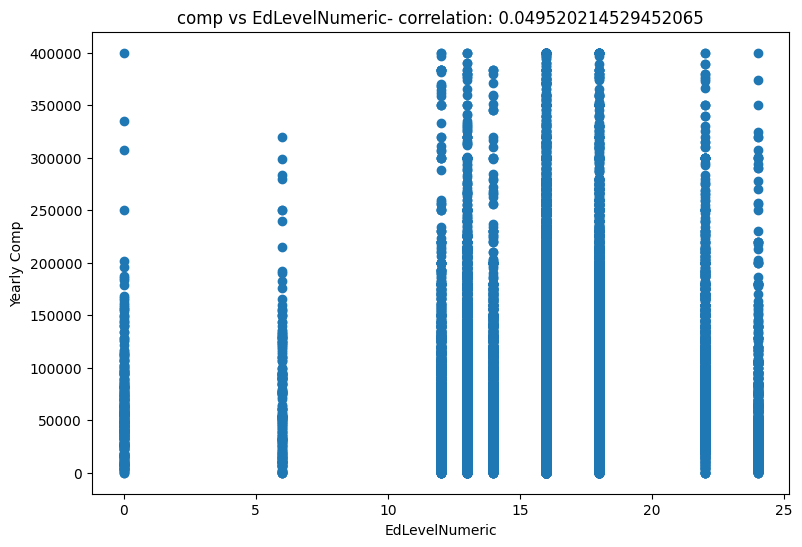

In [78]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = survey_data[col]
    label = survey_data['ConvertedCompYearly']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Yearly Comp')
    ax.set_title('comp vs ' + col + '- correlation: ' + str(correlation))
plt.show()


In [83]:
# Separate features and labels
X, y = survey_data[['YearsCode','YearsCodePro', 'EdLevelNumeric']].values, survey_data['ConvertedCompYearly'].values
print('Features:',X[:10], '\nLabels:', y[:10], sep='\n')

Features:
[[14.  5. 18.]
 [20. 17. 16.]
 [ 6.  6. 18.]
 [ 5.  2. 16.]
 [12. 10. 16.]
 [12.  5. 16.]
 [11.  5. 18.]
 [ 7.  4. 16.]
 [13. 10. 18.]
 [36. 22. 12.]]

Labels:
[ 40205. 215232.  49056.  60307. 194400.  65000. 110000.  19224. 202623.
  51192.]


In [84]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 24271 rows
Test Set: 10402 rows


In [85]:
# Train the model
from sklearn.linear_model import LinearRegression

# Fit a linear regression model on the training set
model = LinearRegression().fit(X_train, y_train)
print (model)

LinearRegression()


In [86]:
import numpy as np

predictions = model.predict(X_test)
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(predictions)[:10])
print('Actual labels   : ' ,y_test[:10])

Predicted labels:  [151444.  77213.  59412.  76888.  62289.  89243.  82092.  67452.  73102.
  62202.]
Actual labels   :  [175000.  14448. 120000. 108590.  96300.  68832. 131181.  91883. 118374.
  38388.]


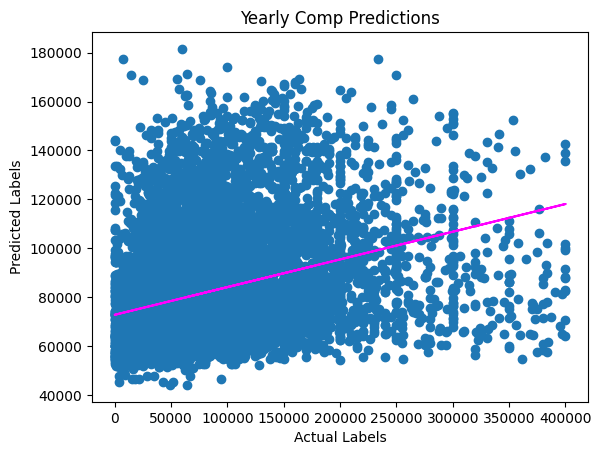

In [87]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Yearly Comp Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [88]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 3860676140.426591
RMSE: 62134.33946238256
R2: 0.1146969181801819


In [95]:
def evaluate_model():
    # Evaluate the model using the test data
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    print("MSE:", mse)
    rmse = np.sqrt(mse)
    print("RMSE:", rmse)
    r2 = r2_score(y_test, predictions)
    print("R2:", r2)

    # Plot predicted vs actual
    plt.scatter(y_test, predictions)
    plt.xlabel('Actual Labels')
    plt.ylabel('Predicted Labels')
    plt.title('Yearly Comp Predictions')
    # overlay the regression line
    z = np.polyfit(y_test, predictions, 1)
    p = np.poly1d(z)
    plt.plot(y_test,p(y_test), color='magenta')
    plt.show()

MSE: 3860677347.752502
RMSE: 62134.34917782999
R2: 0.11469664132470092


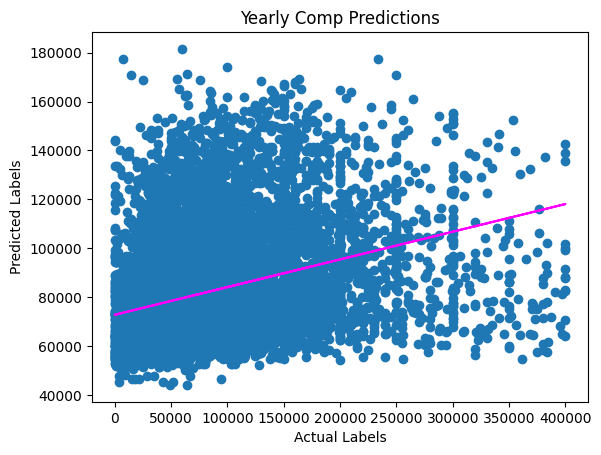

In [97]:
from sklearn.linear_model import Lasso

# Fit a lasso model on the training set
model = Lasso().fit(X_train, y_train)

evaluate_model()

In [91]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

# Train the model
model = DecisionTreeRegressor().fit(X_train, y_train)
print (model, "\n")

# Visualize the model tree
tree = export_text(model)
print(tree)

DecisionTreeRegressor() 

|--- feature_1 <= 5.50
|   |--- feature_1 <= 3.50
|   |   |--- feature_0 <= 5.50
|   |   |   |--- feature_1 <= 2.50
|   |   |   |   |--- feature_2 <= 17.00
|   |   |   |   |   |--- feature_1 <= 1.50
|   |   |   |   |   |   |--- feature_0 <= 4.50
|   |   |   |   |   |   |   |--- feature_2 <= 15.00
|   |   |   |   |   |   |   |   |--- feature_0 <= 3.50
|   |   |   |   |   |   |   |   |   |--- feature_0 <= 2.50
|   |   |   |   |   |   |   |   |   |   |--- feature_2 <= 12.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |   |--- feature_2 >  12.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |--- feature_0 >  2.50
|   |   |   |   |   |   |   |   |   |   |--- feature_2 <= 12.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- feature_2 >  12.50
|   |   |   |   

MSE: 3860677347.752502
RMSE: 62134.34917782999
R2: 0.11469664132470092


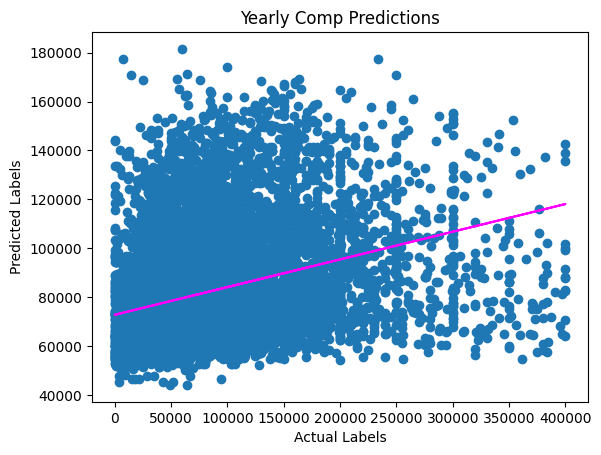

In [98]:
evaluate_model()

MSE: 4067959848.172949
RMSE: 63780.56011178444
R2: 0.06716407714301265


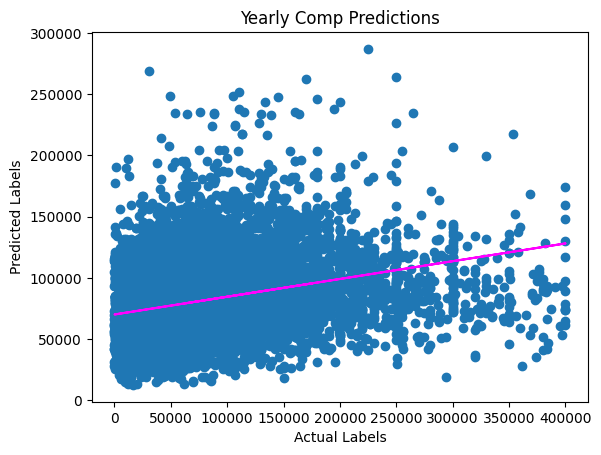

In [99]:
from sklearn.ensemble import RandomForestRegressor

# Train the model
model = RandomForestRegressor().fit(X_train, y_train)

evaluate_model()


MSE: 3752085616.070622
RMSE: 61254.27018641739
R2: 0.13959813298608037


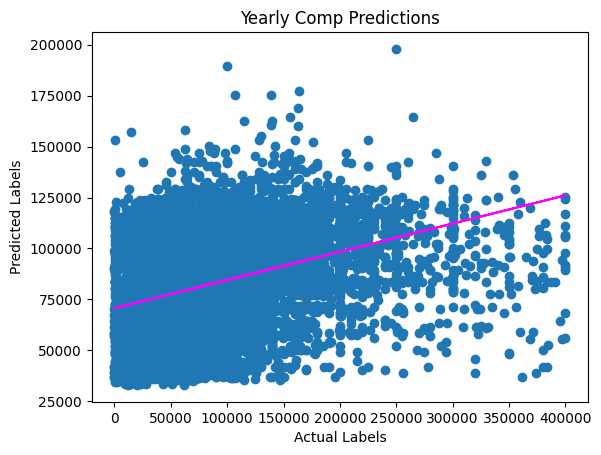

In [101]:
# Train the model
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor().fit(X_train, y_train)

evaluate_model()

In [102]:

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

# Use a Gradient Boosting algorithm
alg = GradientBoostingRegressor()

# Try these hyperparameter values
params = {
 'learning_rate': [0.1, 0.5, 1.0],
 'n_estimators' : [50, 100, 150]
 }

# Find the best hyperparameter combination to optimize the R2 metric
score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring=score, cv=3, return_train_score=True)
gridsearch.fit(X_train, y_train)
print("Best parameter combination:", gridsearch.best_params_, "\n")

# Get the best model
model=gridsearch.best_estimator_
print(model, "\n")

Best parameter combination: {'learning_rate': 0.1, 'n_estimators': 50} 

GradientBoostingRegressor(n_estimators=50) 



MSE: 3747947501.479957
RMSE: 61220.4826955812
R2: 0.14054705630074982


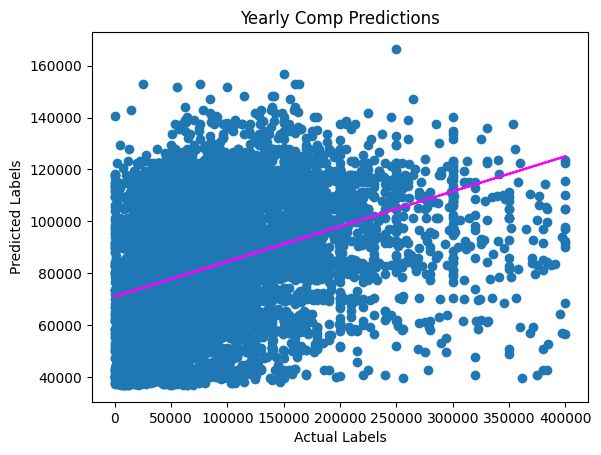

In [103]:
evaluate_model()

Features:
[[14.0 5.0 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)'
  'I am not primarily a developer, but I write code sometimes as part of my work'
  'United Kingdom of Great Britain and Northern Ireland']
 [20.0 17.0 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)'
  'I am a developer by profession' 'Israel']
 [6.0 6.0 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)'
  'I am a developer by profession' 'Netherlands']
 [5.0 2.0 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)'
  'I am a developer by profession'
  'United Kingdom of Great Britain and Northern Ireland']
 [12.0 10.0 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)'
  'I am not primarily a developer, but I write code sometimes as part of my work'
  'United States of America']
 [12.0 5.0 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)'
  'I am a developer by profession' 'United States of America']
 [11.0 5.0 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)'
  'I am a developer by profession' 'United States of America']
 [7.0 4.0

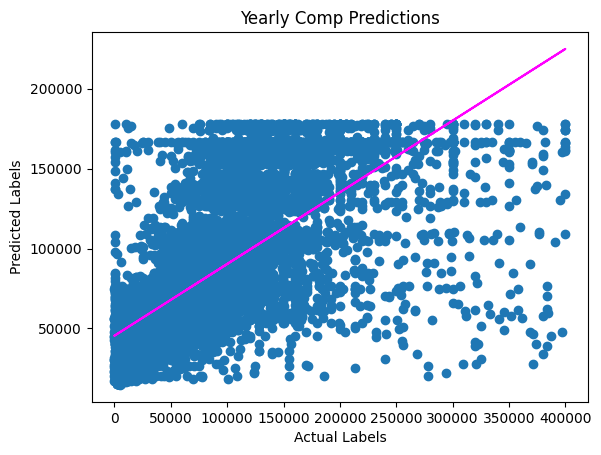

In [145]:
# Train the model
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
import numpy as np

# Separate features and labels
X, y = survey_data[['YearsCode','YearsCodePro', 'EdLevel', 'MainBranch', 'Country']].values, survey_data['ConvertedCompYearly'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
print('Features:',X[:10], '\nLabels:', y[:10], sep='\n')

# Define preprocessing for numeric columns (scale them)
numeric_features = [0, 1]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Define preprocessing for categorical features (encode them)
categorical_features = [2, 3, 4]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', GradientBoostingRegressor())])


# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, (y_train))
evaluate_model()

In [151]:
import joblib

# Save the model as a pickle file
filename = './function/yearly-comp.pkl'
joblib.dump(model, filename)

['./function/yearly-comp.pkl']

In [152]:
# Load the model from the file
loaded_model = joblib.load(filename)

# Create a numpy array containing a new observation (for example tomorrow's seasonal and weather forecast information)
X_new = np.array([[25, 15, 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)','I am a developer by profession', 'United States of America']])
X_new = np.array([[8, 6, 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)','I am a developer by profession', 'United States of America']])
print ('New sample: {}'.format(list(X_new[0])))

# Use the model to predict tomorrow's rentals
result = loaded_model.predict(X_new)
print('Prediction: ${:.0f}'.format(np.round(result[0])))

New sample: ['8', '6', 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)', 'I am a developer by profession', 'United States of America']
Prediction: $135878


In [144]:
uniques = []
for country in survey_data['Country'].unique():
    var_name = country.replace(' ', '_').upper()
    #print(var_name + ' = "' + country + '"')

survey_data['MainBranch'].unique()

array(['I am not primarily a developer, but I write code sometimes as part of my work',
       'I am a developer by profession'], dtype=object)